# Exploratory data analysis

In this document, I will try to look for correlations between the columns in from the data. To do this, I will first need to clean the data.

## 1: Import libraries and file

This also includes formatting the data.

I came to these formats through trial and error. I also used the data's origin (in Google Sheets) to format some columns. V4 in the file name indicates that it is the 4th iteration of the dataset. I also learnt from the first notebook try.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Receipts August 2022 - V4.csv")
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df['time of exit'] = pd.to_datetime(df['time of exit'], format='%H:%M:%S')
df['total'] = df['total'].str.replace(',', '.').astype(float)
df.head(15)

,id,date,total,time of exit
0,11877,2022-08-02,19.45,1900-01-01 16:32:00
1,11878,2022-08-02,35.90,1900-01-01 16:43:00
2,11879,2022-08-12,49.80,1900-01-01 17:49:00
3,11880,2022-08-02,68.10,1900-01-01 18:23:00
4,11881,2022-08-28,25.45,1900-01-01 16:19:00
5,11884,2022-08-28,17.50,1900-01-01 18:18:00
6,11885,2022-08-14,16.50,1900-01-01 16:04:00
7,11886,2022-08-02,71.30,1900-01-01 19:53:00
8,11889,2022-08-14,47.35,1900-01-01 17:09:00
9,11890,2022-08-14,18.75,1900-01-01 18:56:00


In [3]:
df.describe(include='all', datetime_is_numeric=True)

,id,date,total,time of exit
count,175.000000,175,175.000000,175
mean,12012.914286,2022-08-13 17:08:34.285714176,59.474000,1900-01-01 18:46:25.028571904
min,11877.000000,2022-08-02 00:00:00,14.600000,1900-01-01 14:34:00
25%,11939.000000,2022-08-06 00:00:00,41.950000,1900-01-01 17:54:00
50%,12016.000000,2022-08-13 00:00:00,50.500000,1900-01-01 19:01:00
75%,12082.500000,2022-08-21 00:00:00,71.325000,1900-01-01 19:46:30
max,12137.000000,2022-08-31 00:00:00,268.850000,1900-01-01 21:30:00
std,79.943001,NaN,33.168346,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            175 non-null    int64         
 1   date          175 non-null    datetime64[ns]
 2   total         175 non-null    float64       
 3   time of exit  175 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 5.6 KB


The data did not need much cleaning because it was manually input by myself.

## 2: Find correlations

The next step is to find correlations between the columns by plotting them against eachother.

1. Total vs time of exit
2. Total vs date
    - Count/mean/sum of receipts vs time of exit
3. Date vs time of exit
    - Do people leave earlier on specific dates/days

### 2.1: Total vs Time of exit

c:\Users\Jussi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='time of exit', ylabel='total'>

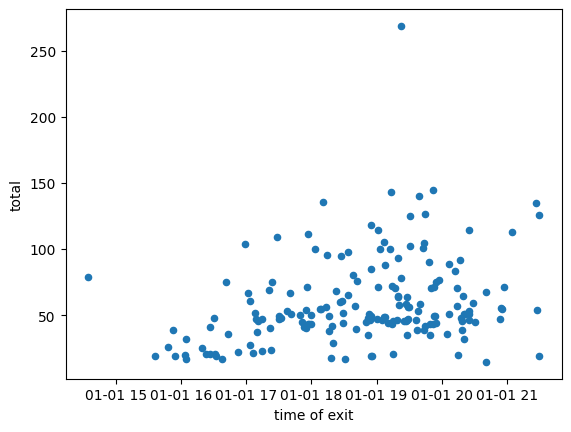

In [5]:
df.plot.scatter(x='time of exit', y='total')


Removing the anomalies 

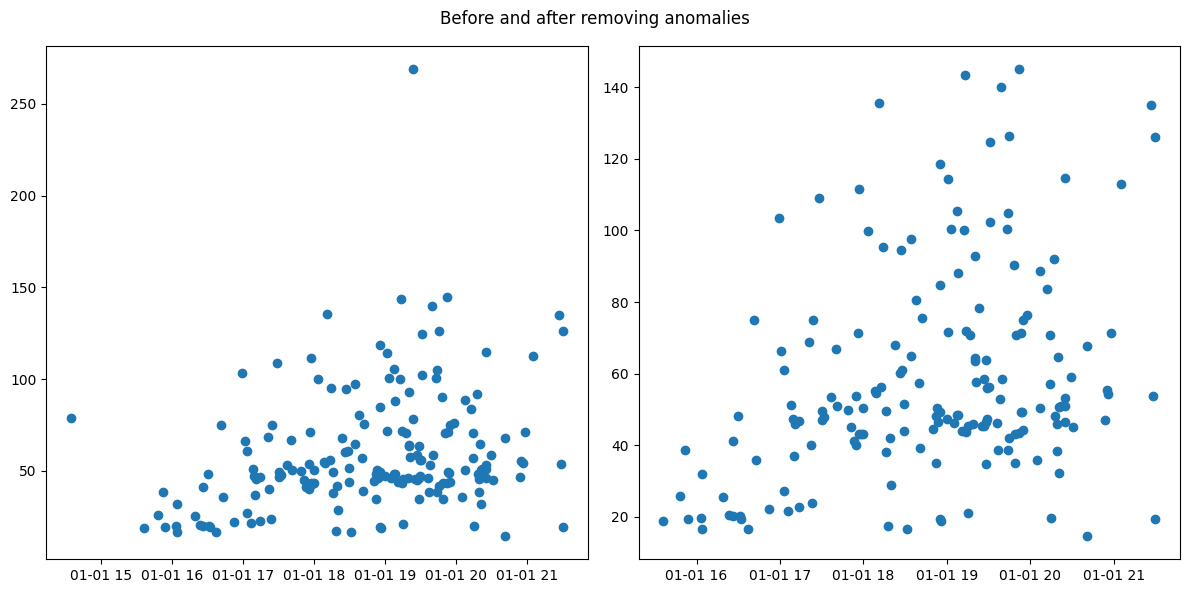

In [6]:
from datetime import datetime
from dateutil import parser

tempdf = df

tempdf = tempdf[tempdf['total'] < 250]
tempdf = tempdf[tempdf['time of exit'] > datetime(year=1900, month=1, day=1, hour=15)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Before and after removing anomalies')
ax1.scatter(df['time of exit'], df['total'])
ax2.scatter(tempdf['time of exit'], tempdf['total'])
fig.tight_layout()

# tempdf.plot.scatter(x='time of exit', y='total')

The new chart lookes better. It gives more information.

In [7]:
df = tempdf

This chart shows a clear correlation between Total receipt value and the time of exit: **the sooner they come, the less they spend**. But from around 18:00, it stays the same. 

(the values on the x axis need to be read withouth the "*01-01*")

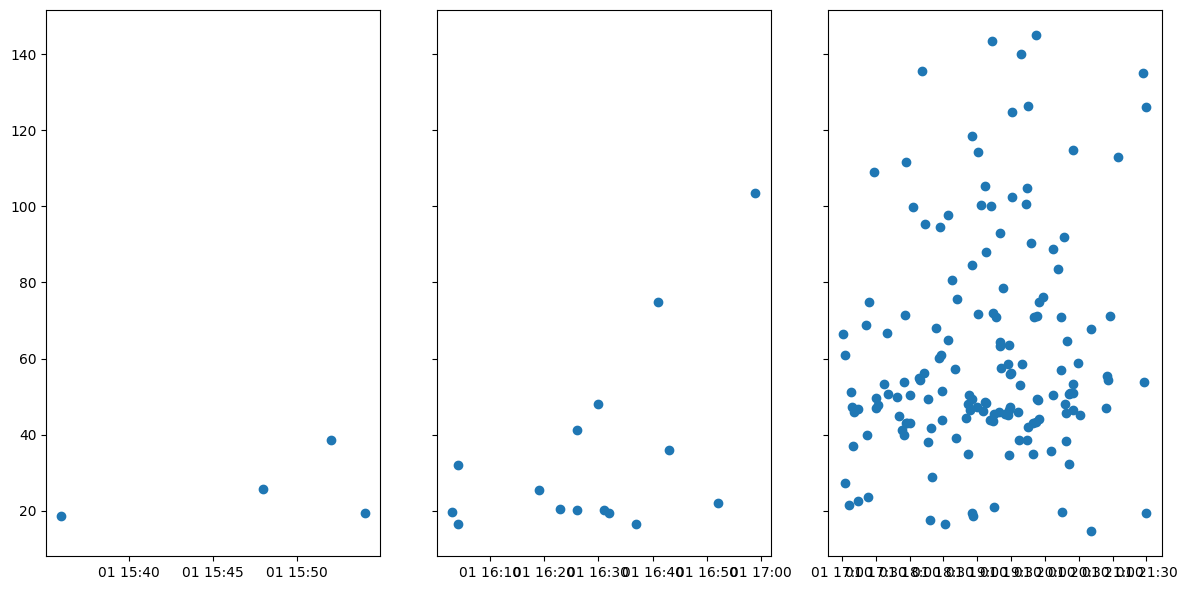

In [8]:
tempdf1 = df.query("`time of exit` < datetime(year=1900, month=1, day=1, hour=16)")
tempdf2 = df.query("`time of exit` > datetime(year=1900, month=1, day=1, hour=16) and `time of exit` < datetime(year=1900, month=1, day=1, hour=17)")
tempdf3 = df.query("`time of exit` > datetime(year=1900, month=1, day=1, hour=17)")

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6), sharey=True)

ax1.scatter(tempdf1['time of exit'], tempdf1['total'])
ax2.scatter(tempdf2['time of exit'], tempdf2['total'])
ax3.scatter(tempdf3['time of exit'], tempdf3['total'])

fig.tight_layout()

### 2.2: Total vs date

- Date
- Day of week

<AxesSubplot: xlabel='date', ylabel='Receipt count'>

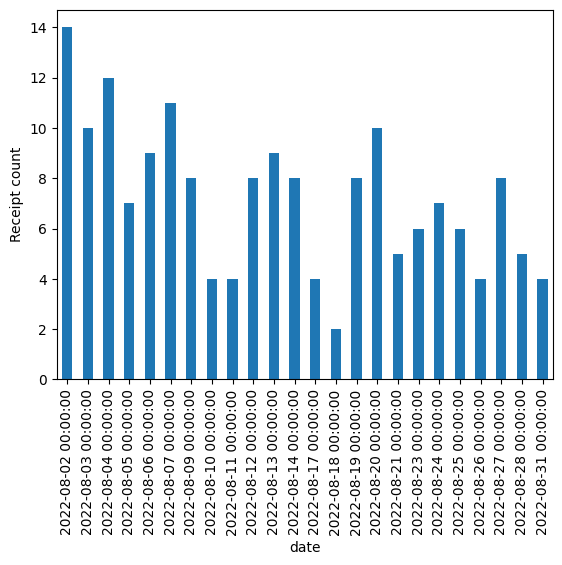

In [9]:
df[['date', 'total']].groupby('date').count().plot(kind='bar', legend=False, ylabel='Receipt count')
# conclusie. Naarmate de zomer eindigt wordt het rustiger. Misschien door het weer?

<AxesSubplot: xlabel='date', ylabel='Mean receipt total'>

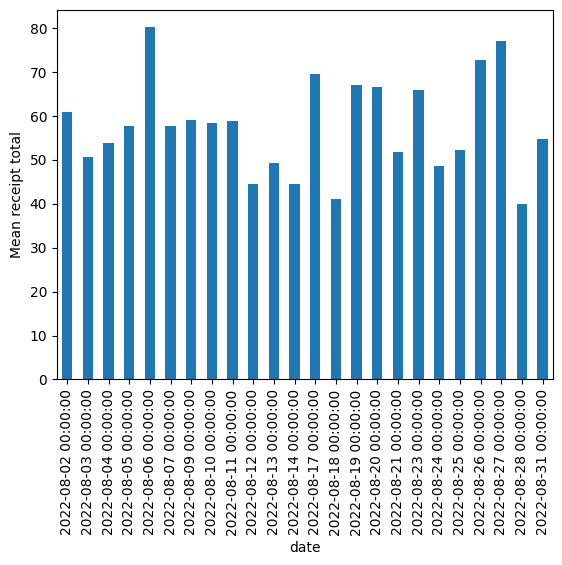

In [10]:
df[['date', 'total']].groupby('date').mean().plot(kind='bar', legend=False, ylabel='Mean receipt total')

In [11]:
# [talk about First addding day column]
dfIncDay = pd.DataFrame()
dfIncDay['day'] = df['date'].dt.day_name()
dfIncDay['total'] = df['total']

<AxesSubplot: xlabel='day', ylabel='Mean receipt total'>

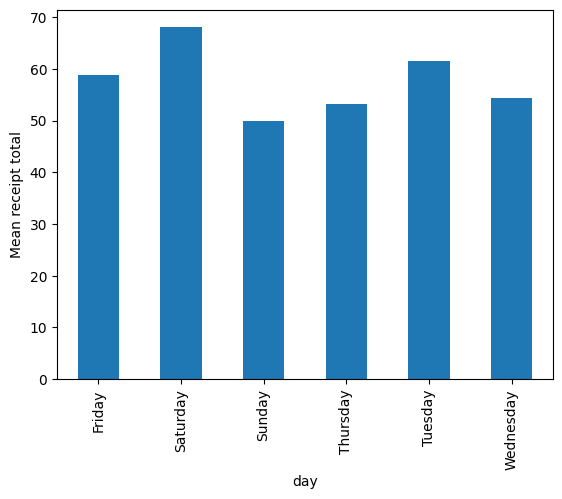

In [12]:
dfIncDay.groupby('day').mean().plot(kind='bar', legend=False, ylabel='Mean receipt total')

<AxesSubplot: xlabel='day', ylabel='Receipt count'>

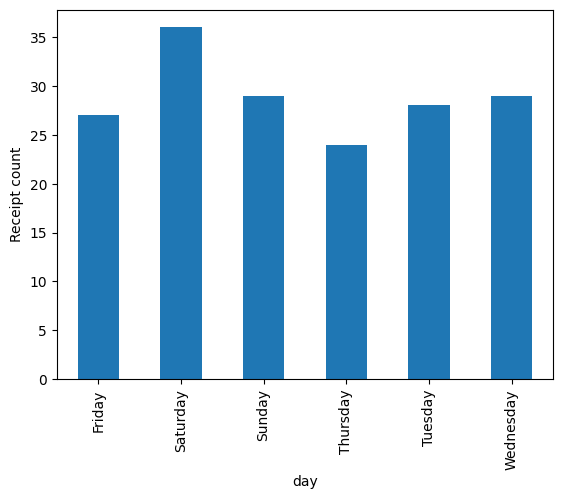

In [13]:
dfIncDay.groupby('day').count().plot(kind='bar', legend=False, ylabel='Receipt count')

c:\Users\Jussi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='day', ylabel='total'>

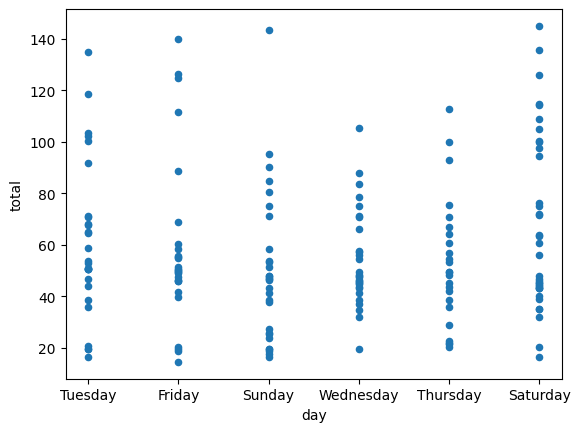

In [14]:
dfIncDay.plot.scatter(x = 'day', y = 'total')

[`Maybe make violin chart from above chart?`]